# Correlation Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'  # macOSÏö©
plt.rcParams['axes.unicode_minus'] = False

class FrequencyCorrelationAnalyzer:
    def __init__(self, df, col1, col2, normalize: bool = False, bins: np.ndarray = None):
        """
        Îã®Ïñ¥ ÎπàÎèÑÏàò Ïª¨Îüº Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÌÅ¥ÎûòÏä§
        
        Parameters:
        df: pandas DataFrame
        col1: Ï≤´ Î≤àÏß∏ ÎπàÎèÑÏàò Ïª¨ÎüºÎ™Ö
        col2: Îëê Î≤àÏß∏ ÎπàÎèÑÏàò Ïª¨ÎüºÎ™Ö
        """
        self.df = df.copy()
        self.col1 = col1
        self.col2 = col2
        self.normalize = normalize
        self.bins = bins

        if self.normalize:
            self.scaler = {
                'col1': StandardScaler(),
                'col2': StandardScaler()
            }
        
        # Í≤∞Ï∏°Í∞í Ï†úÍ±∞
        self.df_clean = self.df[[col1, col2]].dropna()
    
    def normalize_col(self):
        self.df_clean[self.col1] = self.scaler['col1'].fit_transform(self.df_clean[self.col1].values.reshape(-1, 1))
        self.df_clean[self.col2] = self.scaler['col2'].fit_transform(self.df_clean[self.col2].values.reshape(-1, 1))
        
    def calculate_correlation(self):
        """ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞"""
        # ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÏÑ†Ìòï Í¥ÄÍ≥Ñ)
        pearson_corr, pearson_p = stats.pearsonr(self.df_clean[self.col1], self.df_clean[self.col2])
        
        # Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÏàúÏúÑ Í¥ÄÍ≥Ñ)
        spearman_corr, spearman_p = stats.spearmanr(self.df_clean[self.col1], self.df_clean[self.col2])
        
        # ÏºÑÎã¨ ÌÉÄÏö∞ (ÏàúÏúÑ Í¥ÄÍ≥Ñ)
        kendall_corr, kendall_p = stats.kendalltau(self.df_clean[self.col1], self.df_clean[self.col2])
        
        return {
            'pearson': {'correlation': pearson_corr, 'p_value': pearson_p},
            'spearman': {'correlation': spearman_corr, 'p_value': spearman_p},
            'kendall': {'correlation': kendall_corr, 'p_value': kendall_p}
        }
    
    def plot_scatter(self, figsize=(10, 8)):
        """ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ∞Ï†êÎèÑ
        ax1.scatter(self.df_clean[self.col1], self.df_clean[self.col2], alpha=0.6)
        ax1.set_xlabel(self.col1)
        ax1.set_ylabel(self.col2)
        ax1.set_title(f'{self.col1} vs {self.col2} (ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞)')
        ax1.grid(True, alpha=0.3)
        
        # Î°úÍ∑∏ Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏÇ∞Ï†êÎèÑ (ÎπàÎèÑÏàò Îç∞Ïù¥ÌÑ∞Ïóê Ïú†Ïö©)
        log_col1 = np.log1p(self.df_clean[self.col1])  # log(1+x) Î≥ÄÌôò
        log_col2 = np.log1p(self.df_clean[self.col2])
        
        ax2.scatter(log_col1, log_col2, alpha=0.6, color='orange')
        ax2.set_xlabel(f'log(1 + {self.col1})')
        ax2.set_ylabel(f'log(1 + {self.col2})')
        ax2.set_title(f'{self.col1} vs {self.col2} (Î°úÍ∑∏ Î≥ÄÌôò)')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_heatmap(self, figsize=(8, 6)):
        """ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ"""
        corr_matrix = self.df_clean.corr()
        
        plt.figure(figsize=figsize)
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, fmt='.3f')
        plt.title('ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ')
        plt.show()
    
    def plot_distribution(self, figsize=(12, 5)):
        """Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)

        # ÌòÑÏû¨ Í∑∏Î¶¨Îäî Î∂ÑÌè¨Îäî Í∑úÎ™®Í∞Ä ÏÑúÎ°ú Îã§Î•¥ÎØÄÎ°ú, Îã§Î•∏ bin Í∞íÏùÑ Ï†ÅÏö©Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùå.
        if not self.normalize and self.bins is None:
            bins = 30
        elif self.normalize and self.bins is None:
            bins = np.arange(-1.5, 1.5, 0.1)
        else:
            bins = self.bins

        # Ï≤´ Î≤àÏß∏ Ïª¨Îüº Î∂ÑÌè¨
        ax1.hist(self.df_clean[self.col1], bins=bins, alpha=0.7, color='skyblue')
        ax1.set_xlabel(self.col1)
        ax1.set_ylabel('ÎπàÎèÑ')
        ax1.set_title(f'{self.col1} Î∂ÑÌè¨')
        ax1.grid(True, alpha=0.3)
        
        # Îëê Î≤àÏß∏ Ïª¨Îüº Î∂ÑÌè¨
        ax2.hist(self.df_clean[self.col2], bins=bins, alpha=0.7, color='lightcoral')
        ax2.set_xlabel(self.col2)
        ax2.set_ylabel('ÎπàÎèÑ')
        ax2.set_title(f'{self.col2} Î∂ÑÌè¨')
        ax2.grid(True, alpha=0.3)
        
        # Î∞ïÏä§ÌîåÎ°Ø
        ax3.boxplot([self.df_clean[self.col1], self.df_clean[self.col2]], 
                   labels=[self.col1, self.col2])
        ax3.set_ylabel('ÎπàÎèÑÏàò')
        ax3.set_title('Î∞ïÏä§ÌîåÎ°Ø ÎπÑÍµê')
        ax3.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def print_summary(self):
        """Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•"""
        print("=" * 60)
        print("Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º")
        print("=" * 60)
        
        # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
        print(f"\nüìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
        print(f"Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(self.df_clean)}")
        print(f"{self.col1} - ÌèâÍ∑†: {self.df_clean[self.col1].mean():.2f}, ÌëúÏ§ÄÌé∏Ï∞®: {self.df_clean[self.col1].std():.2f}")
        print(f"{self.col2} - ÌèâÍ∑†: {self.df_clean[self.col2].mean():.2f}, ÌëúÏ§ÄÌé∏Ï∞®: {self.df_clean[self.col2].std():.2f}")
        
        # ÏÉÅÍ¥ÄÍ≥ÑÏàò
        corr_results = self.calculate_correlation()
        
        print(f"\nüîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
        print(f"ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_results['pearson']['correlation']:.4f} (p-value: {corr_results['pearson']['p_value']:.4f})")
        print(f"Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_results['spearman']['correlation']:.4f} (p-value: {corr_results['spearman']['p_value']:.4f})")
        print(f"ÏºÑÎã¨ ÌÉÄÏö∞: {corr_results['kendall']['correlation']:.4f} (p-value: {corr_results['kendall']['p_value']:.4f})")
        
        # Ìï¥ÏÑù
        print(f"\nüìù Ìï¥ÏÑù:")
        pearson_corr = corr_results['pearson']['correlation']
        pearson_p = corr_results['pearson']['p_value']
        
        if pearson_p < 0.001:
            significance = "Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)"
        elif pearson_p < 0.01:
            significance = "Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.01)"
        elif pearson_p < 0.05:
            significance = "Ïú†ÏùòÌï® (p < 0.05)"
        else:
            significance = "Ïú†ÏùòÌïòÏßÄ ÏïäÏùå (p >= 0.05)"
        
        print(f"ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: {significance}")
        
        if abs(pearson_corr) >= 0.8:
            strength = "Îß§Ïö∞ Í∞ïÌïú"
        elif abs(pearson_corr) >= 0.6:
            strength = "Í∞ïÌïú"
        elif abs(pearson_corr) >= 0.4:
            strength = "Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò"
        elif abs(pearson_corr) >= 0.2:
            strength = "ÏïΩÌïú"
        else:
            strength = "Îß§Ïö∞ ÏïΩÌïú"
        
        direction = "ÏñëÏùò" if pearson_corr > 0 else "ÏùåÏùò"
        print(f"ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: {strength} {direction} ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
        
        print("=" * 60)
    
    def run_full_analysis(self):
        """Ï†ÑÏ≤¥ Î∂ÑÏÑù Ïã§Ìñâ"""
        if self.normalize:
            self.normalize_col()
        self.print_summary()
        self.plot_scatter()
        self.plot_heatmap()
        self.plot_distribution()

# ÏÇ¨Ïö© ÏòàÏãú Ìï®Ïàò
def analyze_word_frequency_correlation(df: pd.DataFrame, col1: str, col2: str, normalize: bool = False, bins: np.ndarray = None):
    """
    Îã®Ïñ¥ ÎπàÎèÑÏàò Ïª¨Îüº Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ Ïã§ÌñâÌïòÎäî Ìé∏Ïùò Ìï®Ïàò
    
    Parameters:
    df: pandas DataFrame
    col1: Ï≤´ Î≤àÏß∏ ÎπàÎèÑÏàò Ïª¨ÎüºÎ™Ö
    col2: Îëê Î≤àÏß∏ ÎπàÎèÑÏàò Ïª¨ÎüºÎ™Ö
    normalize: Ï†ïÍ∑úÌôî Ïó¨Î∂Ä
    bins: Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî Ïãú ÏÇ¨Ïö©Ìï† bin Í∞í
    """
    analyzer = FrequencyCorrelationAnalyzer(df, col1, col2, normalize, bins)
    analyzer.run_full_analysis()
    return analyzer

## file validity check.

In [3]:
import os
from pathlib import Path

# ÌååÏùº Í≤ΩÎ°ú ÌôïÏù∏.
proj_path = os.path.dirname(os.path.dirname(Path.cwd()))
corpora_dir = os.path.join(proj_path, 'Corpora')
CSAT_json_path = save_path = os.path.join(corpora_dir, 'CSAT-latest')

# ÌååÏùº Í≤ΩÎ°ú Ïú†Ìö®ÏÑ± ÌôïÏù∏.
if not os.path.exists(proj_path):
    raise FileNotFoundError(f"Project path not found at {proj_path}")
if not os.path.exists(CSAT_json_path):
    raise FileNotFoundError(f"CSAT json path not found at {CSAT_json_path}")
if not any(file.endswith('.json') for file in os.listdir(CSAT_json_path)):
    raise FileExistsError(f"Any .json file doesn't exist in {CSAT_json_path}")
print("All file paths are valid.")

All file paths are valid.


## HAL vs SUBTLEX

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_excel(os.path.join(corpora_dir, 'merged_corpora', 'CSAT_E_lexicon.xlsx'))
df

Word  Length  CSAT_Freq  CSAT_only_Freq  Textbook_only_Freq  \
0             a       1     1284.0          1098.0               186.0   
1           aah       3        NaN             NaN                 NaN   
2         aaron       5        NaN             NaN                 NaN   
3         aback       5        NaN             NaN                 NaN   
4        abacus       6        NaN             NaN                 NaN   
...         ...     ...        ...             ...                 ...   
40476      zoom       4        NaN             NaN                 NaN   
40477   zooming       7        NaN             NaN                 NaN   
40478     zooms       5        NaN             NaN                 NaN   
40479  zucchini       8        NaN             NaN                 NaN   
40480    zurich       6        NaN             NaN                 NaN   

       Freq_HAL   SUBTLWF  CSAT_RFreq  CSAT_only_RFreq  Textbook_only_RFreq  \
0      10610626  20415.27    0.001284         0.001098             0.000186   
1           222     52.71         NaN              NaN                  NaN   
2         10806     14.65         NaN              NaN                  NaN   
3           387      0.29         NaN              NaN                  NaN   
4           513      0.24         NaN              NaN                  NaN   
...         ...       ...         ...              ...                  ...   
40476      4920      3.55         NaN              NaN                  NaN   
40477       523      0.63         NaN              NaN                  NaN   
40478       385      0.06         NaN              NaN                  NaN   
40479       314      0.96         NaN              NaN                  NaN   
40480      1770      2.43         NaN              NaN                  NaN   

       Ortho_N_CSAT  Ortho_N_CSAT(only)  Ortho_N_Textbook(only)  Ortho_N  \
0               1.0                 1.0                     1.0        1   
1               NaN                 NaN                     NaN        2   
2               NaN                 NaN                     NaN        3   
3               NaN                 NaN                     NaN        0   
4               NaN                 NaN                     NaN        0   
...             ...                 ...                     ...      ...   
40476           NaN                 NaN                     NaN        4   
40477           NaN                 NaN                     NaN        3   
40478           NaN                 NaN                     NaN        3   
40479           NaN                 NaN                     NaN        0   
40480           NaN                 NaN                     NaN        0   

       OLD20_CSAT  OLD20_CSAT(only)  OLD20_Textbook(only)   OLD  SUBTLCD  \
0             1.5               1.5                  1.65  1.45    99.93   
1             NaN               NaN                   NaN  1.85     7.56   
2             NaN               NaN                   NaN  1.85     1.93   
3             NaN               NaN                   NaN  1.95     0.18   
4             NaN               NaN                   NaN  2.90     0.12   
...           ...               ...                   ...   ...      ...   
40476         NaN               NaN                   NaN  1.70     1.29   
40477         NaN               NaN                   NaN  1.85     0.31   
40478         NaN               NaN                   NaN  1.80     0.04   
40479         NaN               NaN                   NaN  3.75     0.25   
40480         NaN               NaN                   NaN  2.80     0.74   

            POS  
0      minor|NN  
1           NaN  
2            NN  
3            RB  
4            NN  
...         ...  
40476     VB|NN  
40477        VB  
40478        VB  
40479        NN  
40480        NN  

[40481 rows x 20 columns]

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 35515
Freq_HAL - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
SUBTLWF - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.7993 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.8020 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.6132 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


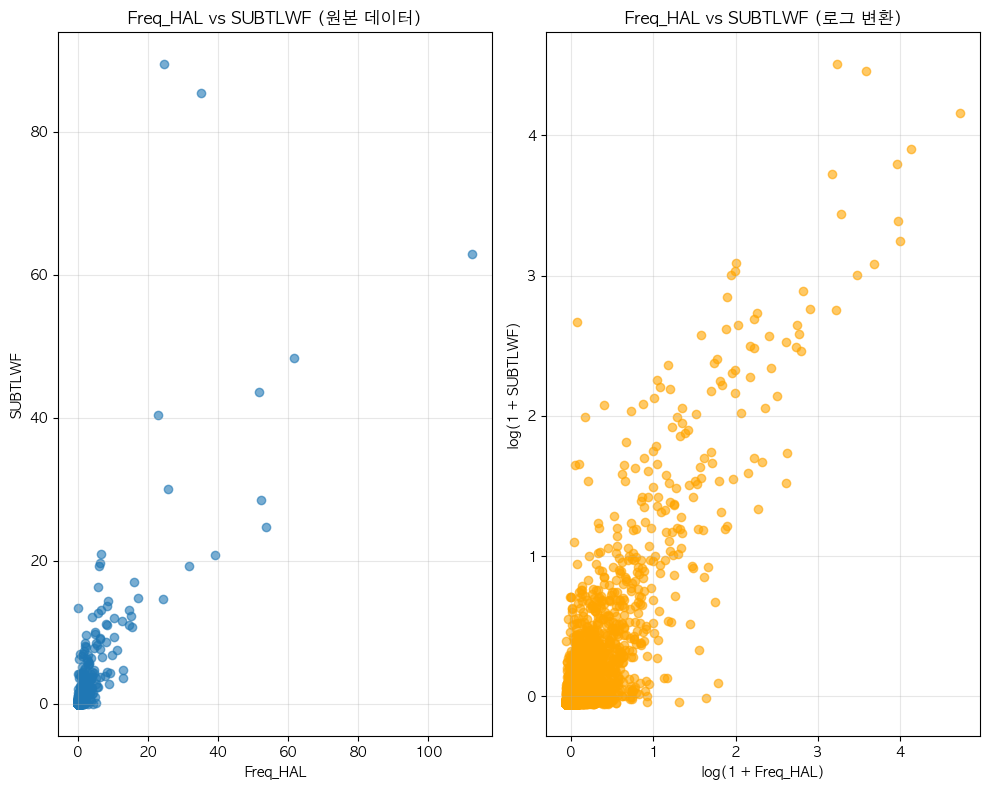

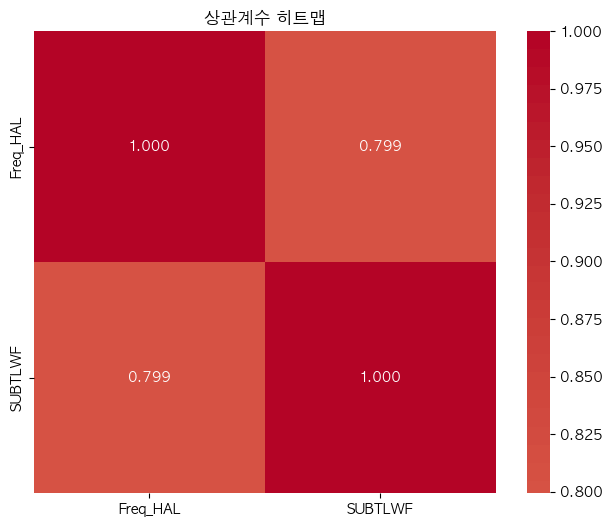

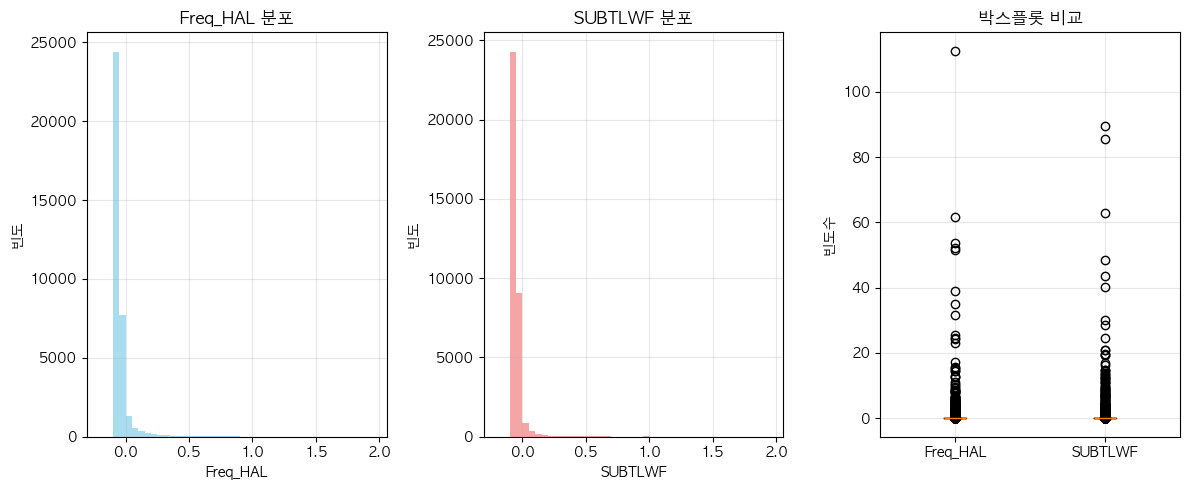

In [43]:
analyzer = analyze_word_frequency_correlation(df, 'Freq_HAL', 'SUBTLWF', normalize=True, bins=np.arange(-.2, 2, 0.05))

## CSAT(only) vs Textbook(only)

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 1524
CSAT_only_Freq - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
Textbook_only_Freq - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9745 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.6237 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.5169 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


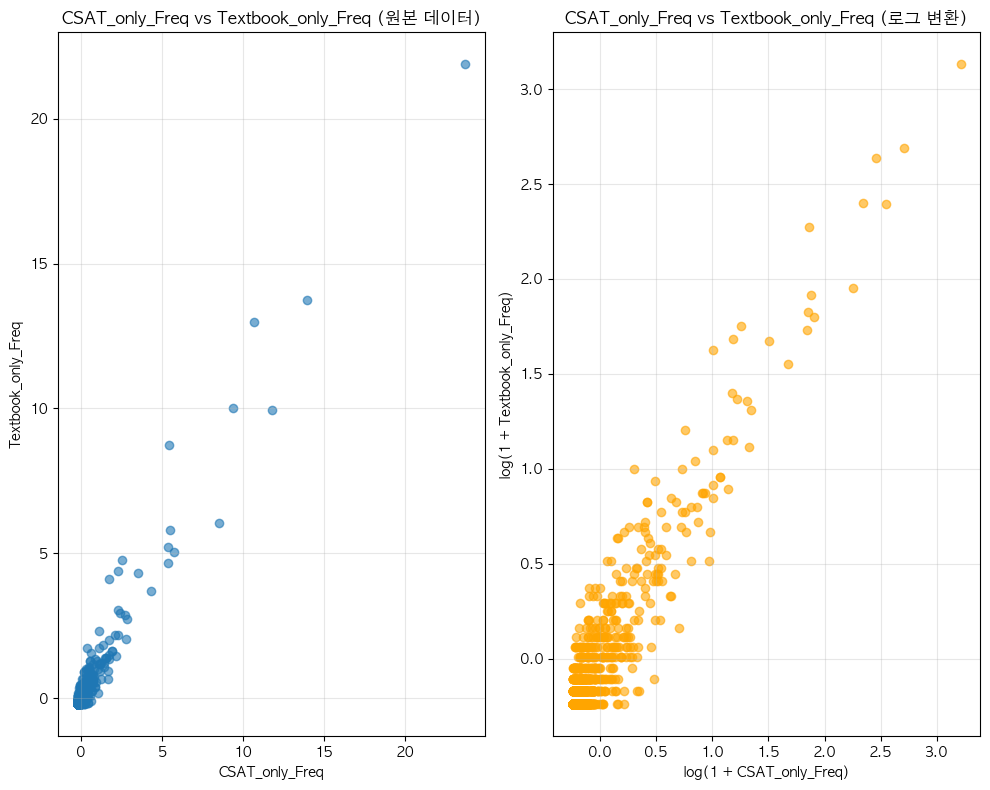

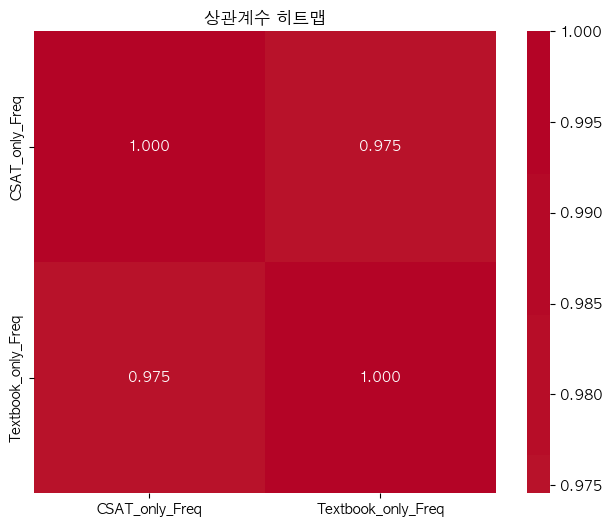

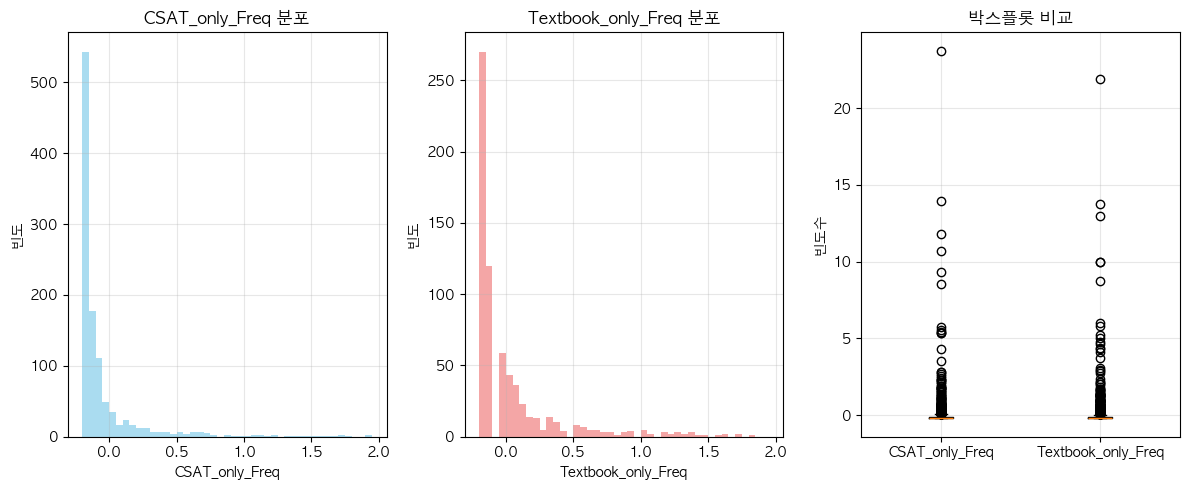

In [44]:
analyzer = analyze_word_frequency_correlation(df, 'CSAT_only_Freq', 'Textbook_only_Freq', normalize=True, bins=np.arange(-.2, 2, 0.05))

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 1524
Ortho_N_CSAT(only) - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
Ortho_N_Textbook(only) - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.8512 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.7993 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.7434 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


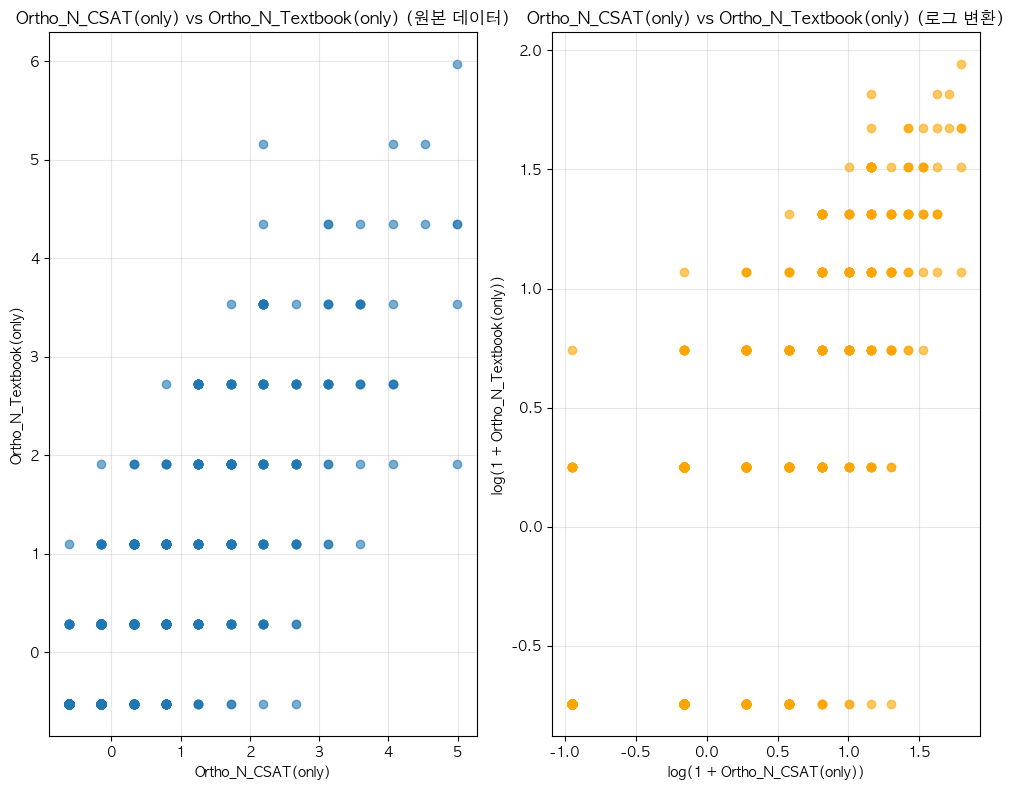

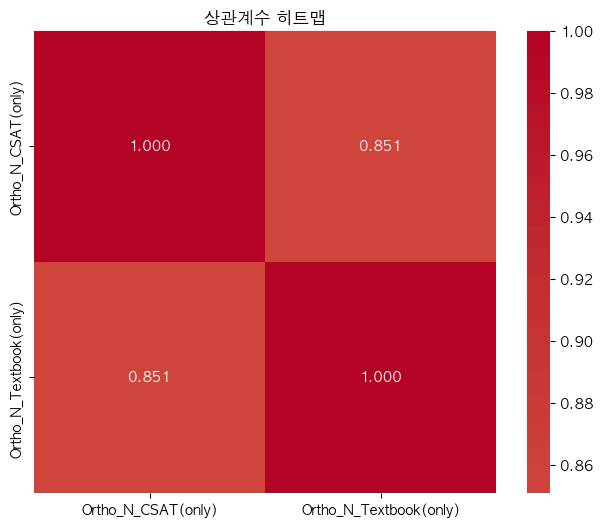

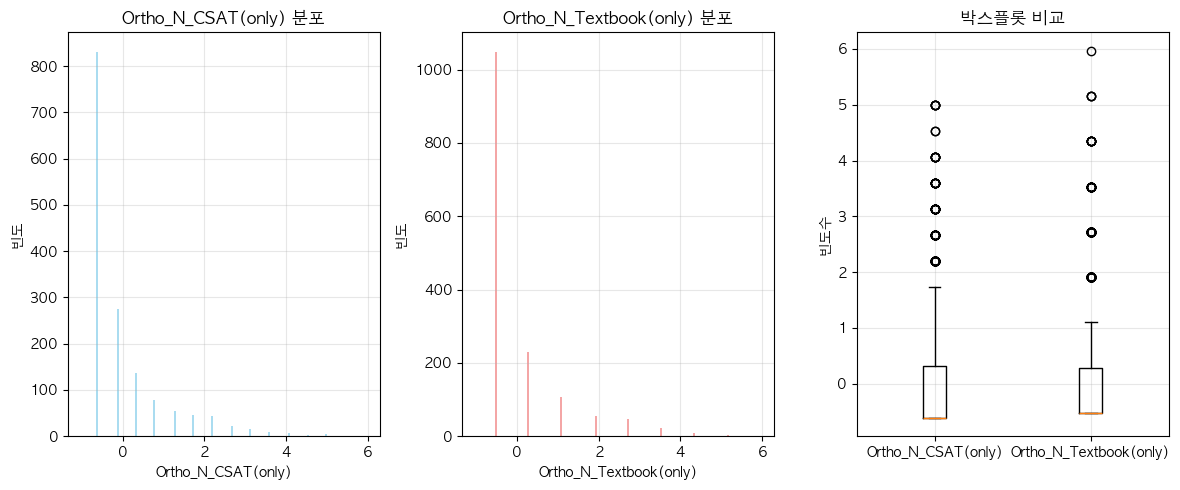

In [45]:
analyzer = analyze_word_frequency_correlation(df, 'Ortho_N_CSAT(only)', 'Ortho_N_Textbook(only)', normalize=True, bins=np.arange(-1, 6, 0.05))

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 1524
OLD20_CSAT(only) - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
OLD20_Textbook(only) - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9694 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9701 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.8639 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


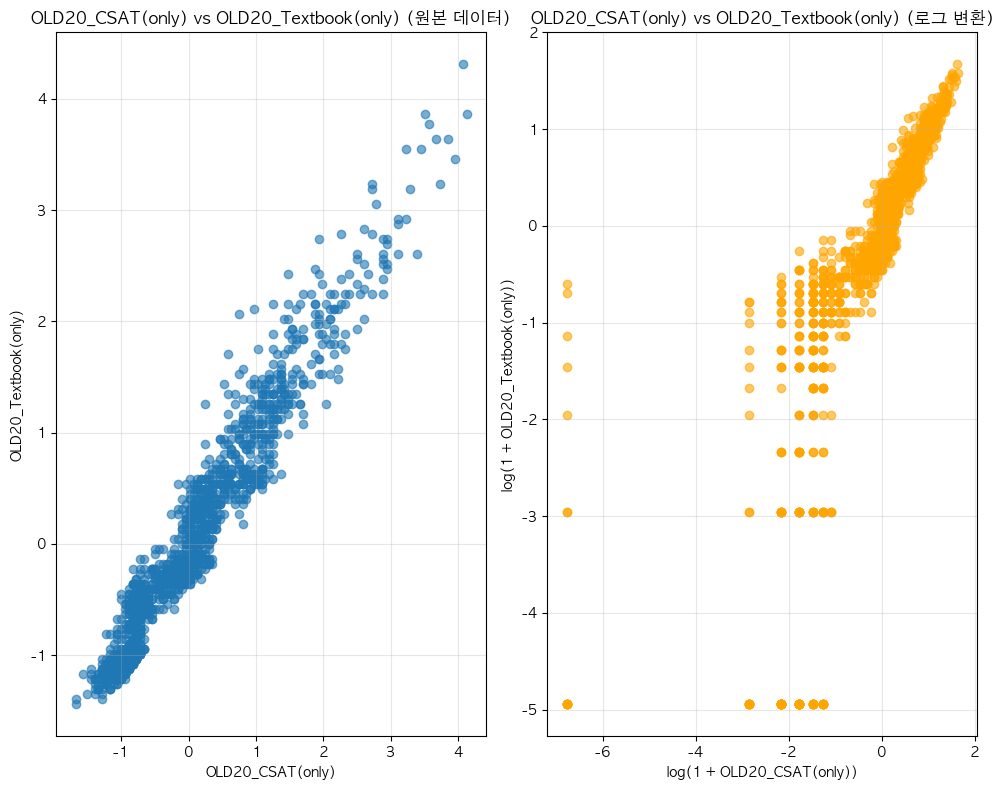

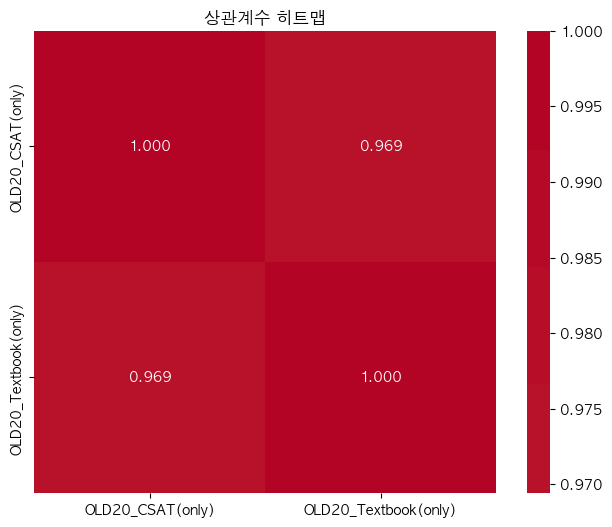

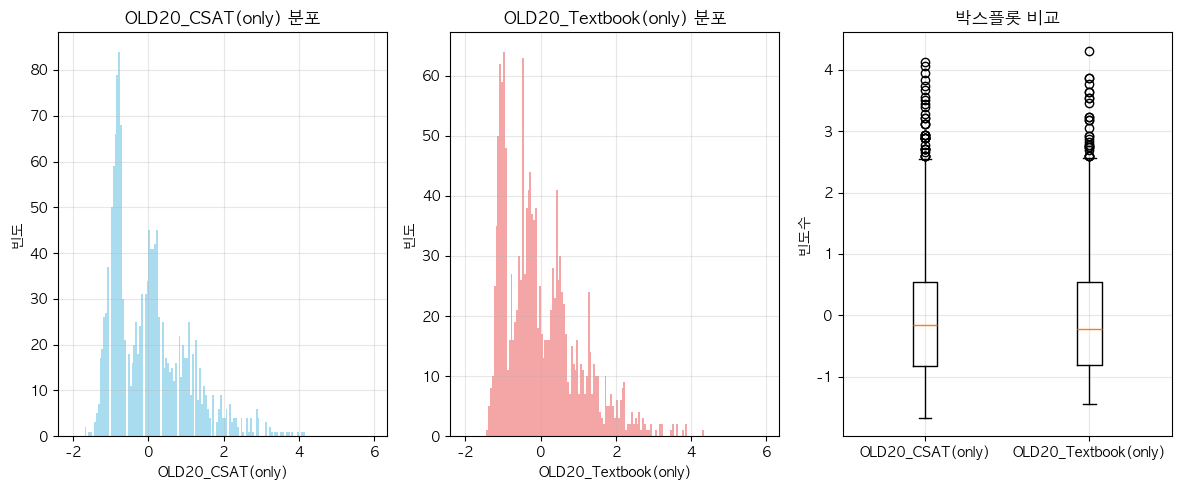

In [46]:
analyzer = analyze_word_frequency_correlation(df, 'OLD20_CSAT(only)', 'OLD20_Textbook(only)', normalize=True, bins=np.arange(-2, 6, 0.05))

## CSAT vs HAL

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 6915
CSAT_Freq - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
Freq_HAL - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9861 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.6761 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.5364 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


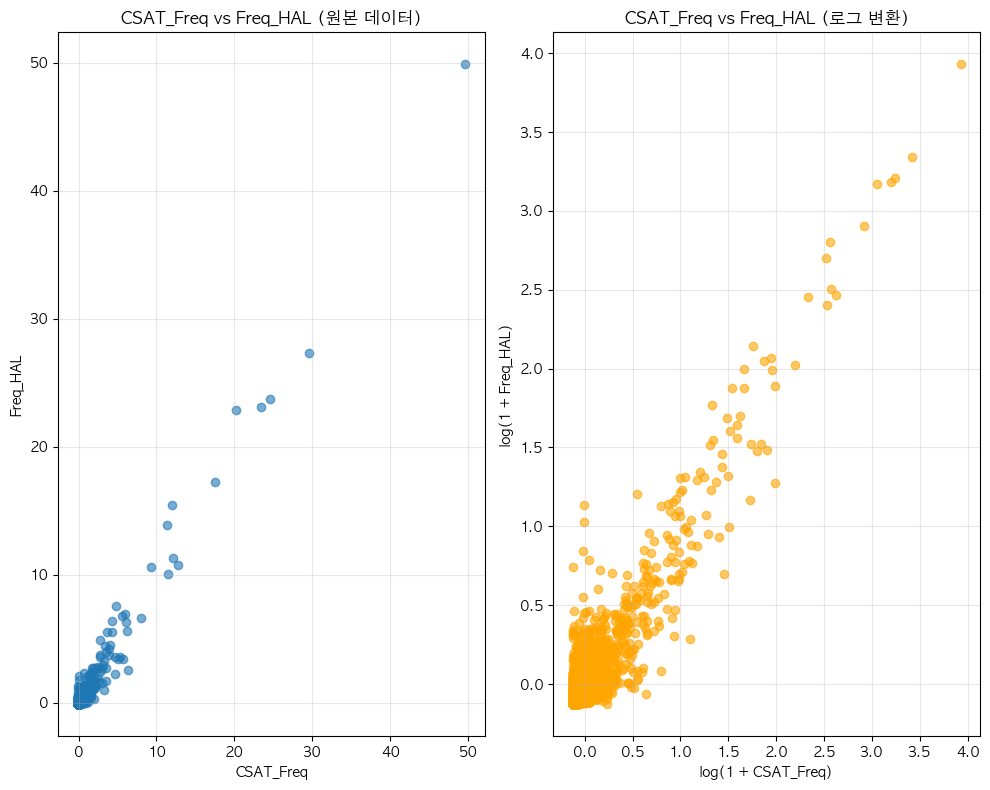

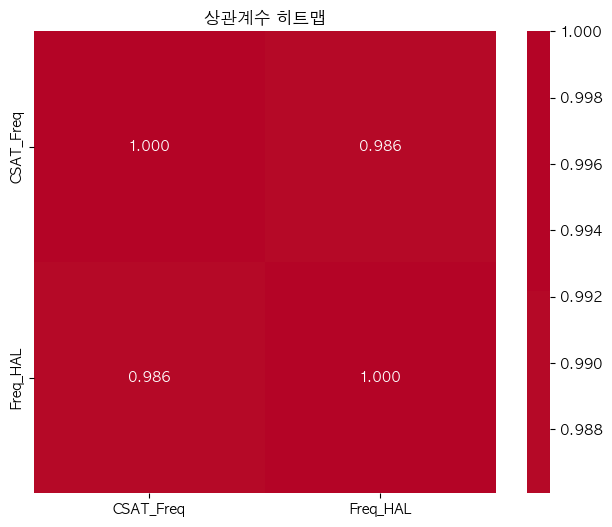

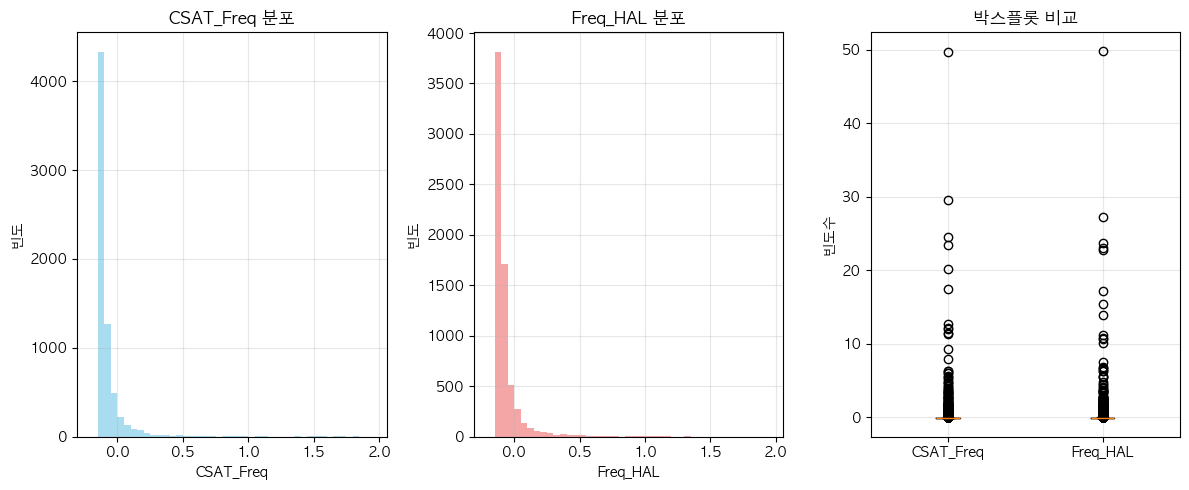

In [49]:
analyzer = analyze_word_frequency_correlation(df, 'CSAT_Freq', 'Freq_HAL', normalize=True, bins=np.arange(-.2, 2, 0.05))

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 6915
CSAT_RFreq - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
Freq_HAL - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9861 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.6761 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.5364 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


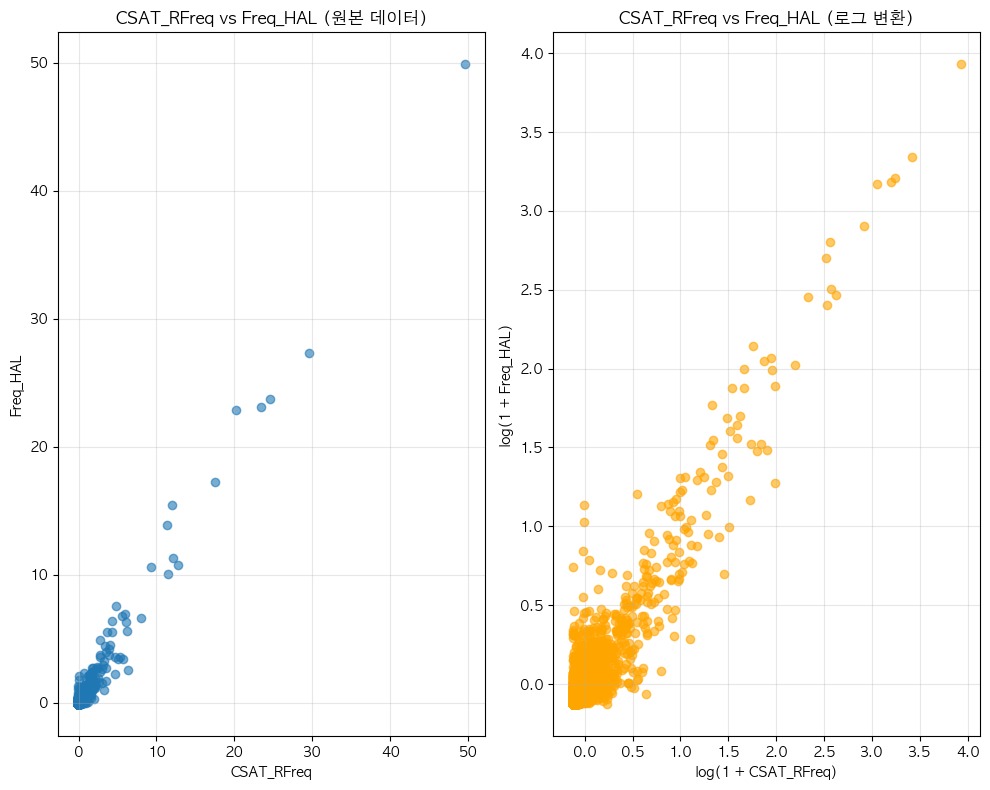

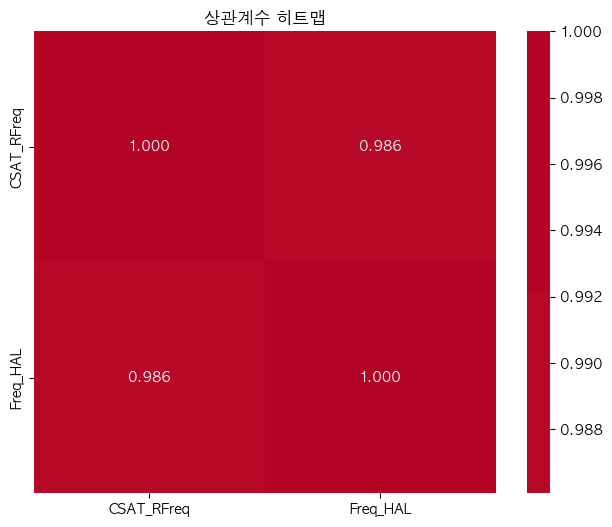

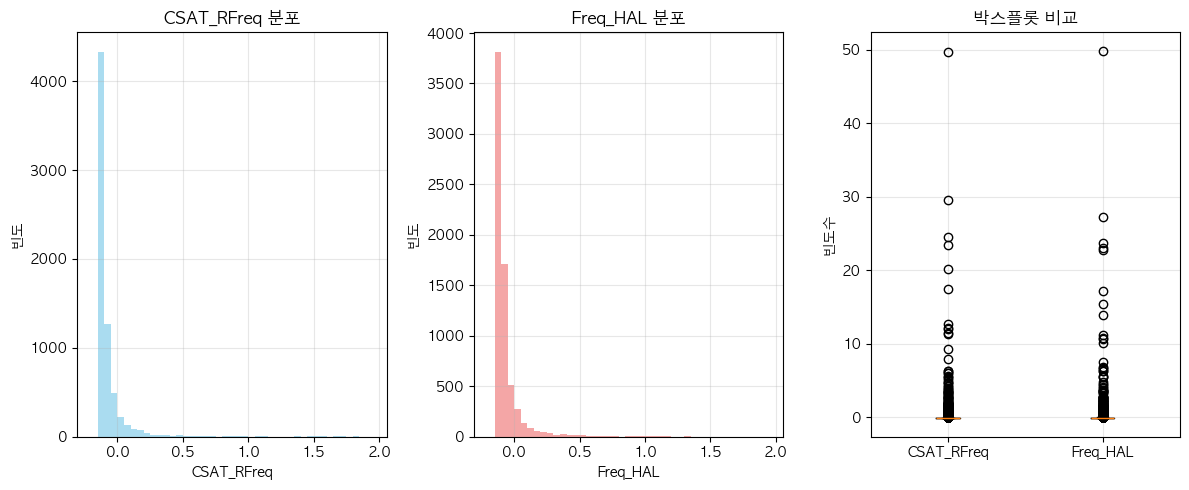

In [50]:
# 100Îßå token Îã®ÏúÑÎ°ú Î≥ÄÌôòÌïú ÏÉÅÎåÄÎπàÎèÑÎùºÎèÑ Í≤∞Íµ≠ transformationÏù¥ linearÌïòÎãà, corrÎäî Î≥ÄÌïòÏßÄ ÏïäÏùå.
analyzer = analyze_word_frequency_correlation(df, 'CSAT_RFreq', 'Freq_HAL', normalize=True, bins=np.arange(-.2, 2, 0.05))

In [52]:
df.columns

Index(['Word', 'Length', 'CSAT_Freq', 'CSAT_only_Freq', 'Textbook_only_Freq',
       'Freq_HAL', 'SUBTLWF', 'CSAT_RFreq', 'CSAT_only_RFreq',
       'Textbook_only_RFreq', 'Ortho_N_CSAT', 'Ortho_N_CSAT(only)',
       'Ortho_N_Textbook(only)', 'Ortho_N', 'OLD20_CSAT', 'OLD20_CSAT(only)',
       'OLD20_Textbook(only)', 'OLD', 'SUBTLCD', 'POS'],
      dtype='object')

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 1906
OLD - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
OLD20_Textbook(only) - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9401 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9393 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.7989 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


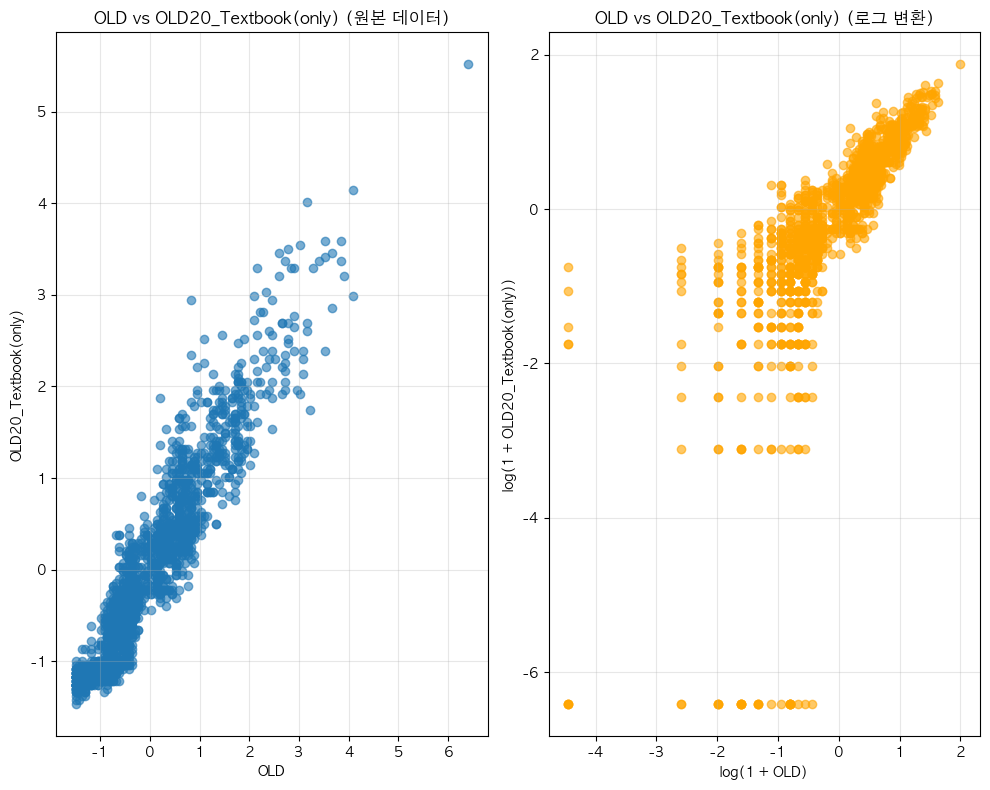

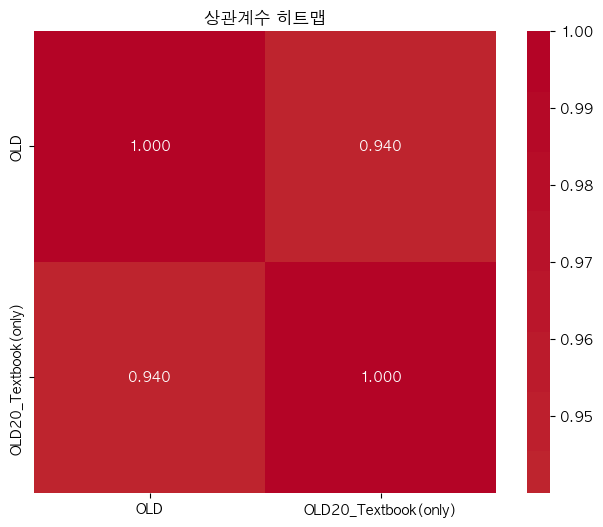

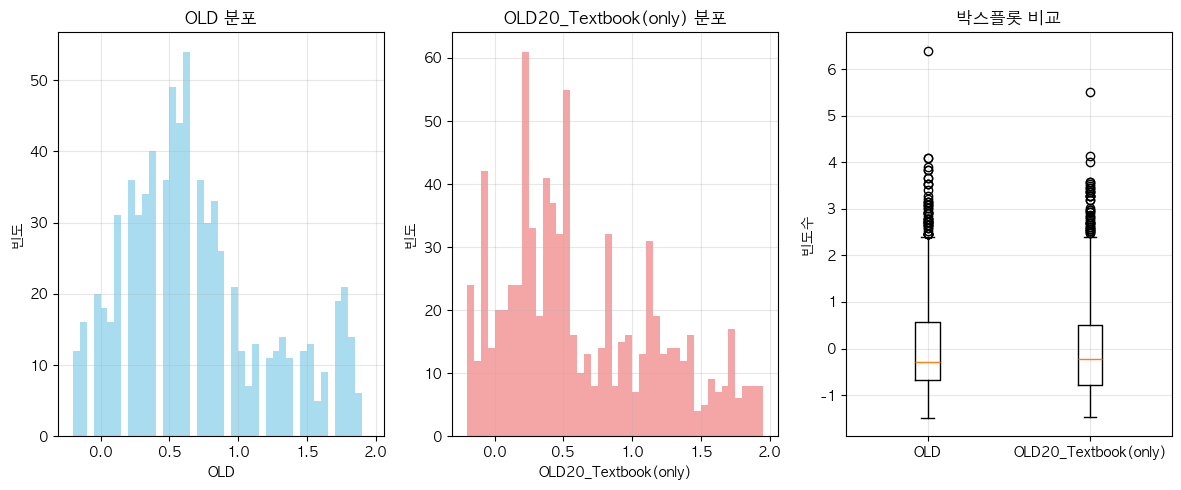

In [53]:
analyzer = analyze_word_frequency_correlation(df, 'OLD', 'OLD20_Textbook(only)', normalize=True, bins=np.arange(-.2, 2, 0.05))

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 6495
OLD - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
OLD20_CSAT(only) - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9606 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9641 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.8491 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


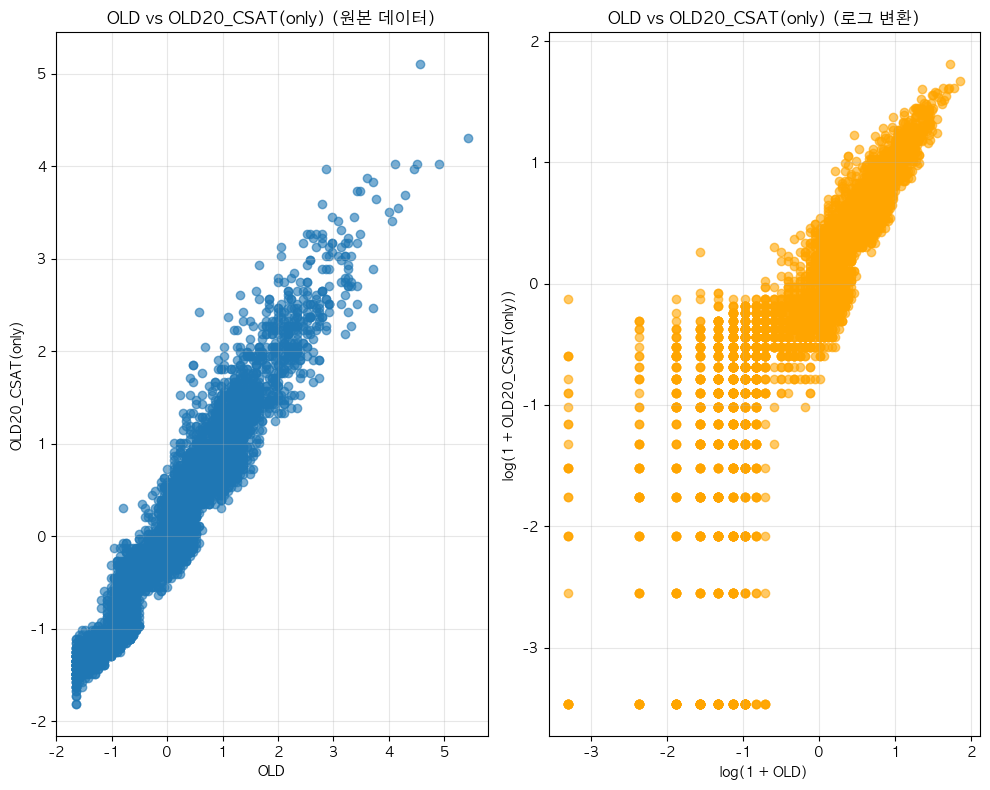

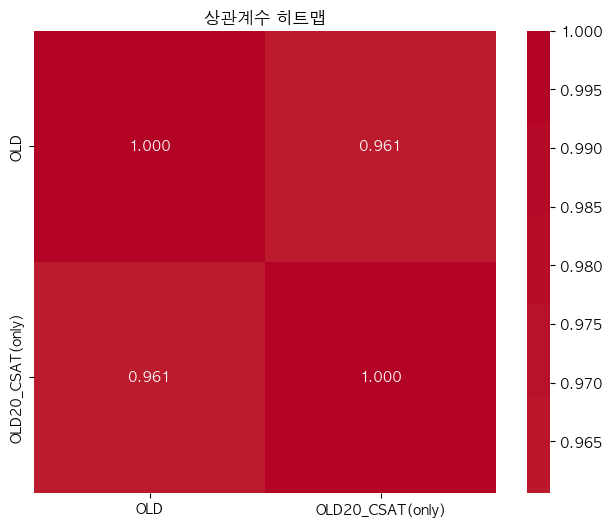

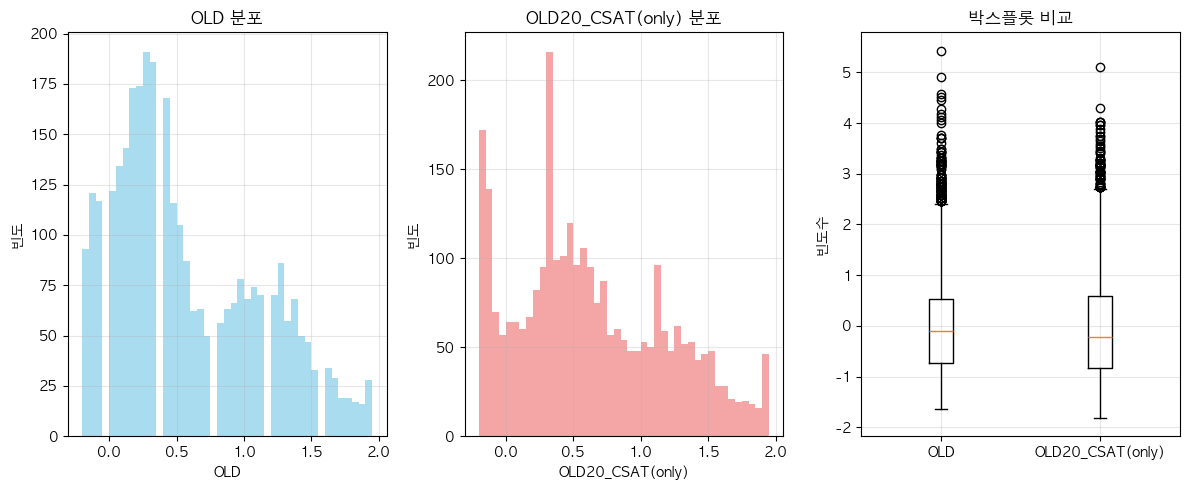

In [54]:
analyzer = analyze_word_frequency_correlation(df, 'OLD', 'OLD20_CSAT(only)', normalize=True, bins=np.arange(-.2, 2, 0.05))

## CSAT vs SUBTLEX

Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º

üìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 6827
CSAT_Freq - ÌèâÍ∑†: -0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00
SUBTLWF - ÌèâÍ∑†: 0.00, ÌëúÏ§ÄÌé∏Ï∞®: 1.00

üîó ÏÉÅÍ¥ÄÍ≥ÑÏàò:
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.7926 (p-value: 0.0000)
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.5953 (p-value: 0.0000)
ÏºÑÎã¨ ÌÉÄÏö∞: 0.4620 (p-value: 0.0000)

üìù Ìï¥ÏÑù:
ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Îß§Ïö∞ Ïú†ÏùòÌï® (p < 0.001)
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ïÎèÑ: Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


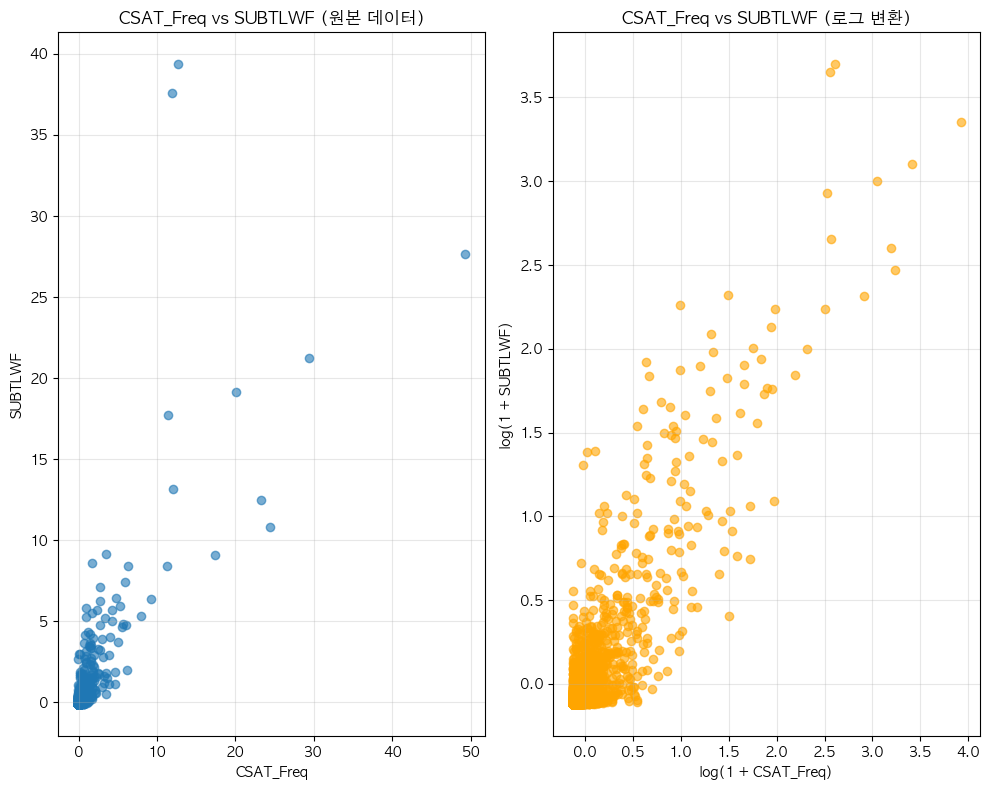

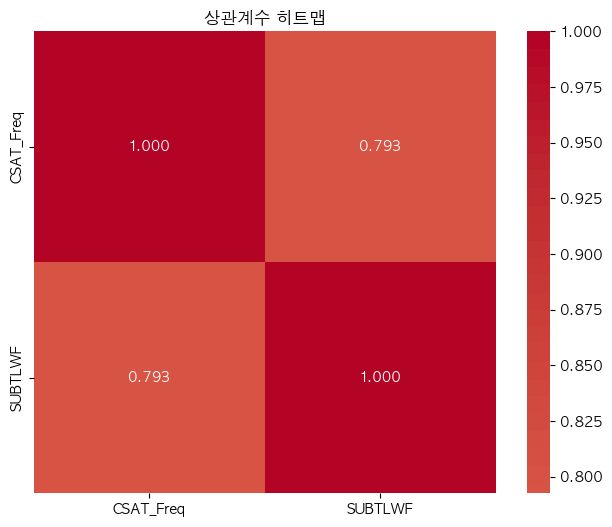

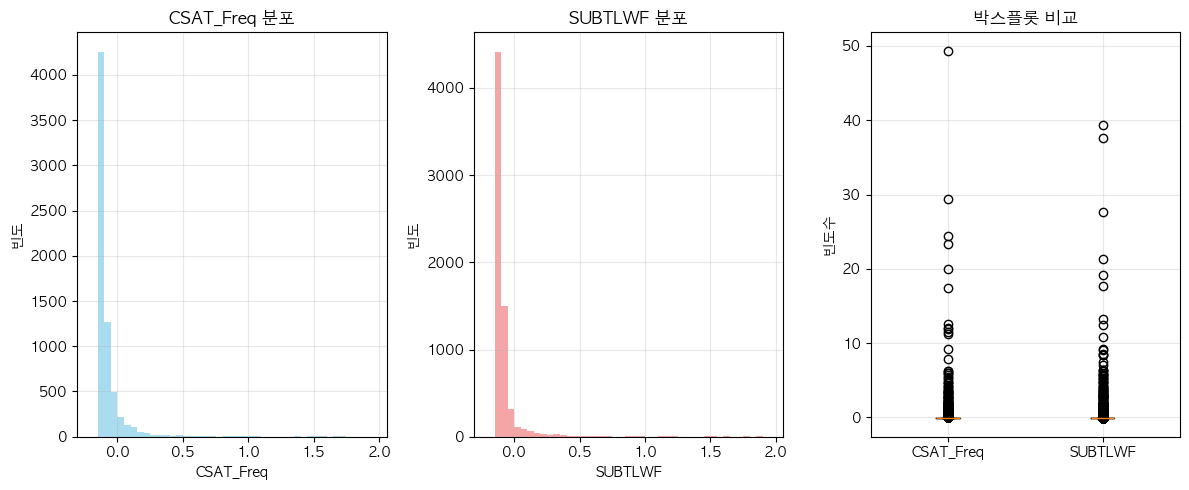

In [51]:
analyzer = analyze_word_frequency_correlation(df, 'CSAT_Freq', 'SUBTLWF', normalize=True, bins=np.arange(-.2, 2, 0.05))